<a href="https://colab.research.google.com/github/eonadler/Colab-Notebooks/blob/main/Week_7_Custom_Dark_Matter_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dark Matter & Data Visualization Week 7: Custom Dark Matter Visualizations

This week, you'll start to create your own custom visualization of a dark matter simulation. In particular, you'll make scatter-plots of halo positions as a rough draft of your final visualization, which will be created using the dark matter particle density field.

The goals for this notebook are:

1.   Select the coordinates of the region you'd like to visualize;
2.   Choose the colormap that will be used in your visualization.


## Table of Contents:
* [Find Your Visualization Region](#first-bullet)
* [Choose a Colormap](#second-bullet)
* [Submit Your Parameters](#third-bullet)

In [ ]:
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import gdown

%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.style.use('dark_background')

## Find Your Visualization Region <a name="first-bullet"></a>

First, we'll load the simulation data used in previous notebooks. Recall that this simulation contains $2048^3$ (or $\approx 8.6$ billion) particles and covers a volume of $\approx 5.7$ million cubic Megaparsecs, or $\approx 18$ trillion cubic lightyears. Each dark matter particle in this simulation has a mass of roughly $10$ million suns. The "cosmological parameters" that govern this simulation, including the amounts of dark matter and dark energy and the expansion rate of the universe, are chosen to match current observations.

The cell below loads an array of all dark matter halos above a mass threshold from the simulation; each element of the array corresponds to a single halo and contains several halo properties.

In [ ]:
#Download simulation data
url = "https://drive.google.com/uc?id=1LpeH3YuwcKDXpCyOIYkgrBcq9vzGQIQo"
output = "halos.bin"
gdown.download(url, output, quiet=False)

#Load halo catalog
with open(r"halos.bin", "rb") as f:
    halos = pickle.load(f, encoding='latin1')

Downloading...
From: https://drive.google.com/uc?id=1LpeH3YuwcKDXpCyOIYkgrBcq9vzGQIQo
To: /content/halos.bin
100%|██████████| 1.70G/1.70G [00:08<00:00, 211MB/s]


The visualization below shows how halos are distributed in the entire simulation volume, projected into the $x$-$y$ plane:

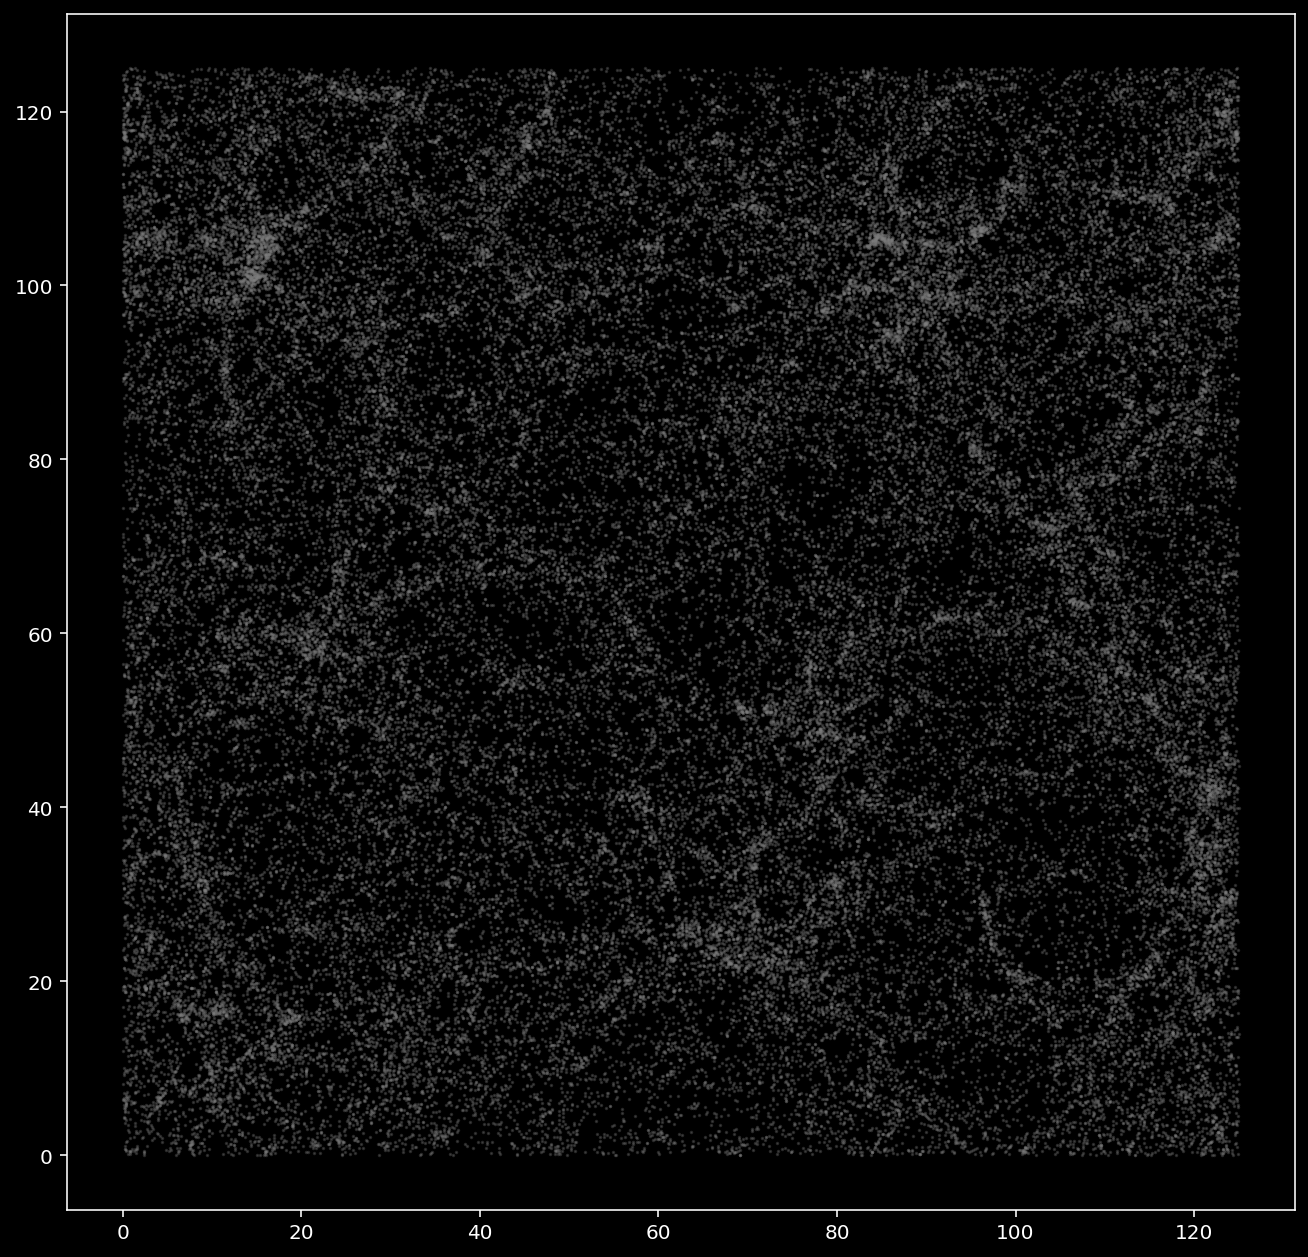

In [ ]:
#Visualize cosmic web of halos
plt.figure(figsize=(11,11))

plt.scatter(halos['x'][halos['mvir']>1e11],halos['y'][halos['mvir']>1e11],c='gray',s=0.5,alpha=0.3)

plt.show()

Next, you'll choose a particular region of this simulation to visualize at higher resolution. Change the parameters `x_center`, `y_center`, and `z_center` until you're happy with the structure in the plot.

Because the simulation cube has side lengths of
(x,y,z) = (125,125,125), make sure that:

`0 < x_center - size < x_center + size < 125`,

`0 < y_center - size < y_center + size < 125`,

`0 < z_center - projection_length < z_center + projection_length < 125`

In [ ]:
#Change the following parameters until you're happy with the structure in the plot
x_center = 80.
y_center = 80.
z_center = 60.

In [ ]:
#The plots will look best if the following parameters aren't changed; however, you can experiment with changing them if you'd like!
size = 40.
projection_length = 10

#Don't change this!
dist_along_z = np.abs(halos['z']-z_center)

x_region = ((halos['x'] > x_center-size/2.) & (halos['x'] < x_center+size/2.))
y_region = ((halos['y'] > y_center-size/2.) & (halos['y'] < y_center+size/2.))
z_region = dist_along_z<projection_length

halos_in_region = halos[(x_region) & (y_region) & (z_region)]

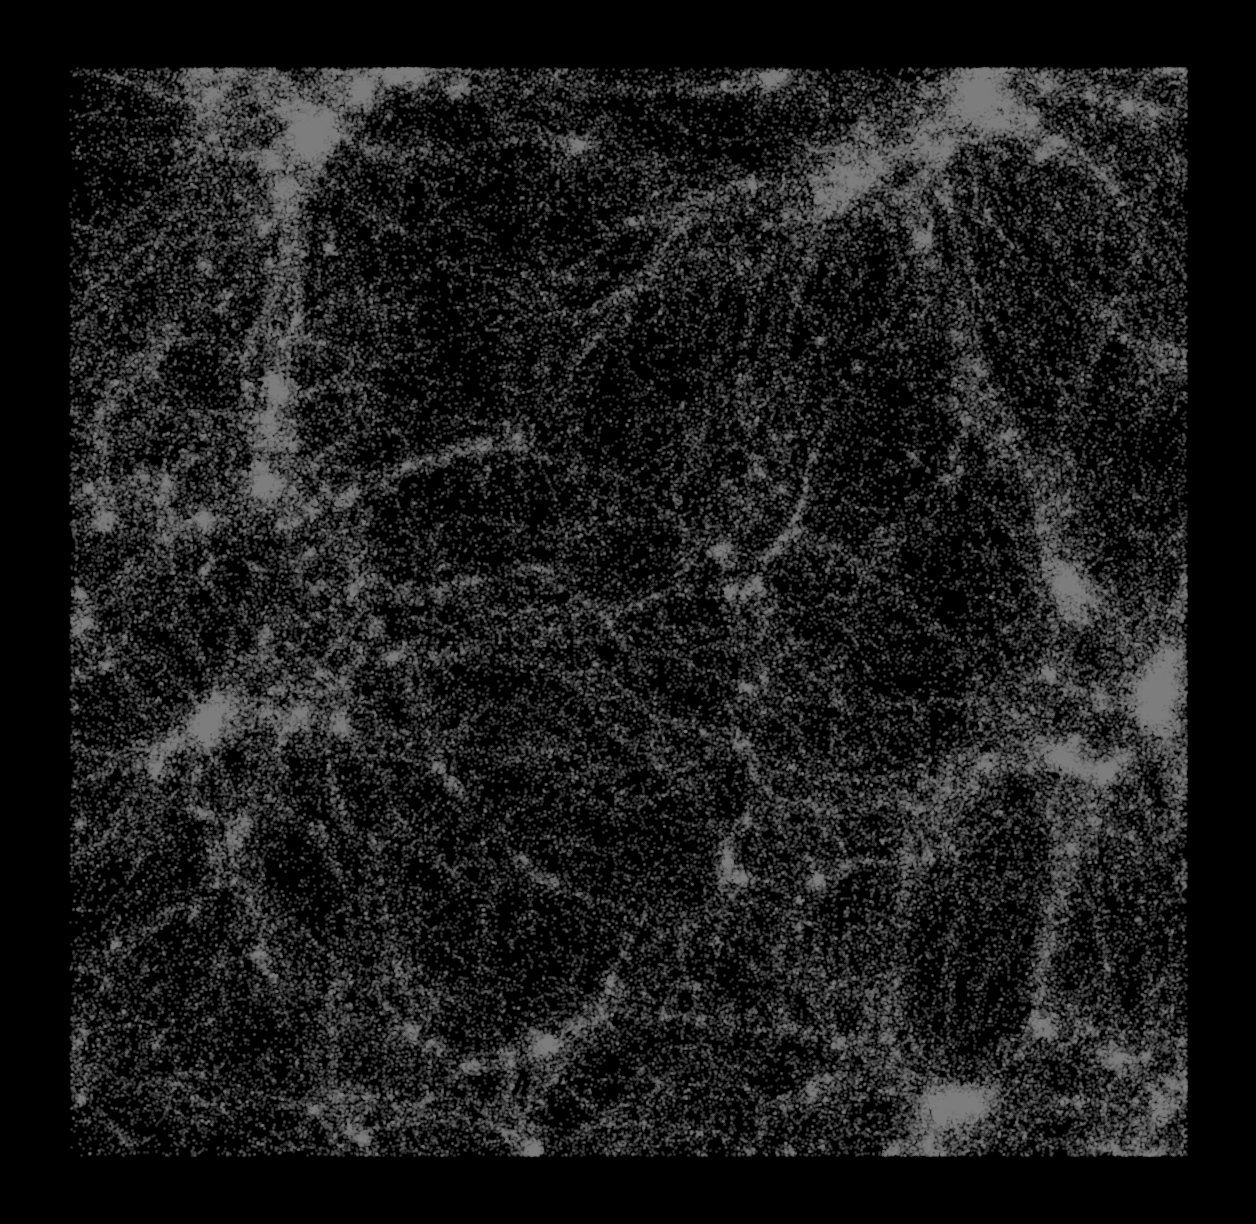

In [ ]:
#Visualize your selected region
plt.figure(figsize=(11,11))

plt.scatter(halos_in_region['x'],halos_in_region['y'],
            c='gray',s=0.5,alpha=0.25)

plt.axis('off')

plt.show()

## Choose a Colormap <a name="second-bullet"></a>

Your final visualization will use a colormap based on the density of dark matter particles in the simulation. To workshop the colormap, we'll use the density calculated from halo positions and masses in your selected region, and set colors for the underdense/transition/dense regions that continuously blend between each other.

The cell below uses a built-in Python colormap for inspiration (you can see all of these pre-existing choices [here](https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html)).

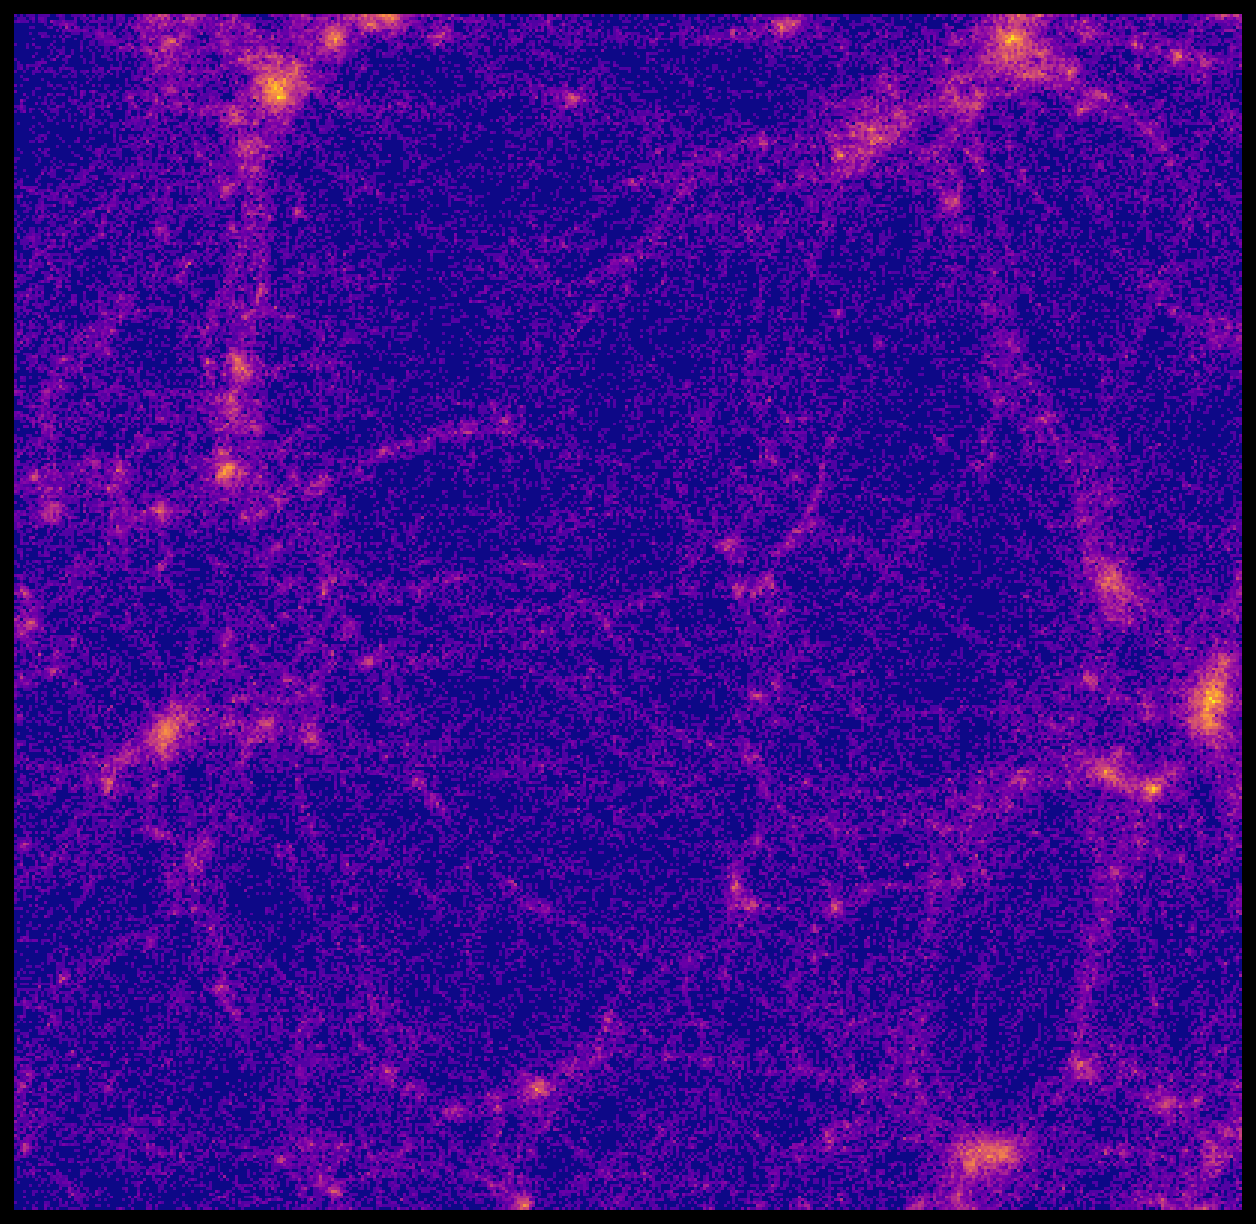

In [ ]:
#Pre-defined Python colormap based on halo density
plt.figure(figsize=(11,11))

plt.hist2d(halos_in_region['x'],halos_in_region['y'],
           bins=[int(len(halos_in_region)/500.),int(len(halos_in_region)/500.)],weights=np.log10(halos_in_region['mvir']),
           norm=colors.PowerNorm(gamma=0.5),cmap='plasma')

plt.axis('off')

plt.show()

The cell below defines a custom colormap based on the desired colors for underdense, transition, and dense regions. Change these colors to any three HEX codes you'd like by selecting colors [here](https://www.w3schools.com/colors/colors_hexadecimal.asp), until you're happy with the colors displayed in the plot below.

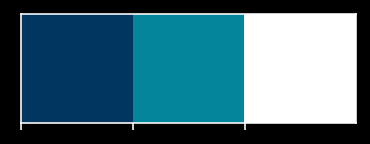

In [ ]:
#Change these to your desired colors
underdense_color = "#003660"
transition_color = "#04859B"
dense_color = "#ffffff"

#Don't change
custom_colors = np.array([underdense_color,transition_color,dense_color])
sns.palplot(custom_colors)
custom_colormap = colors.LinearSegmentedColormap.from_list("", custom_colors)

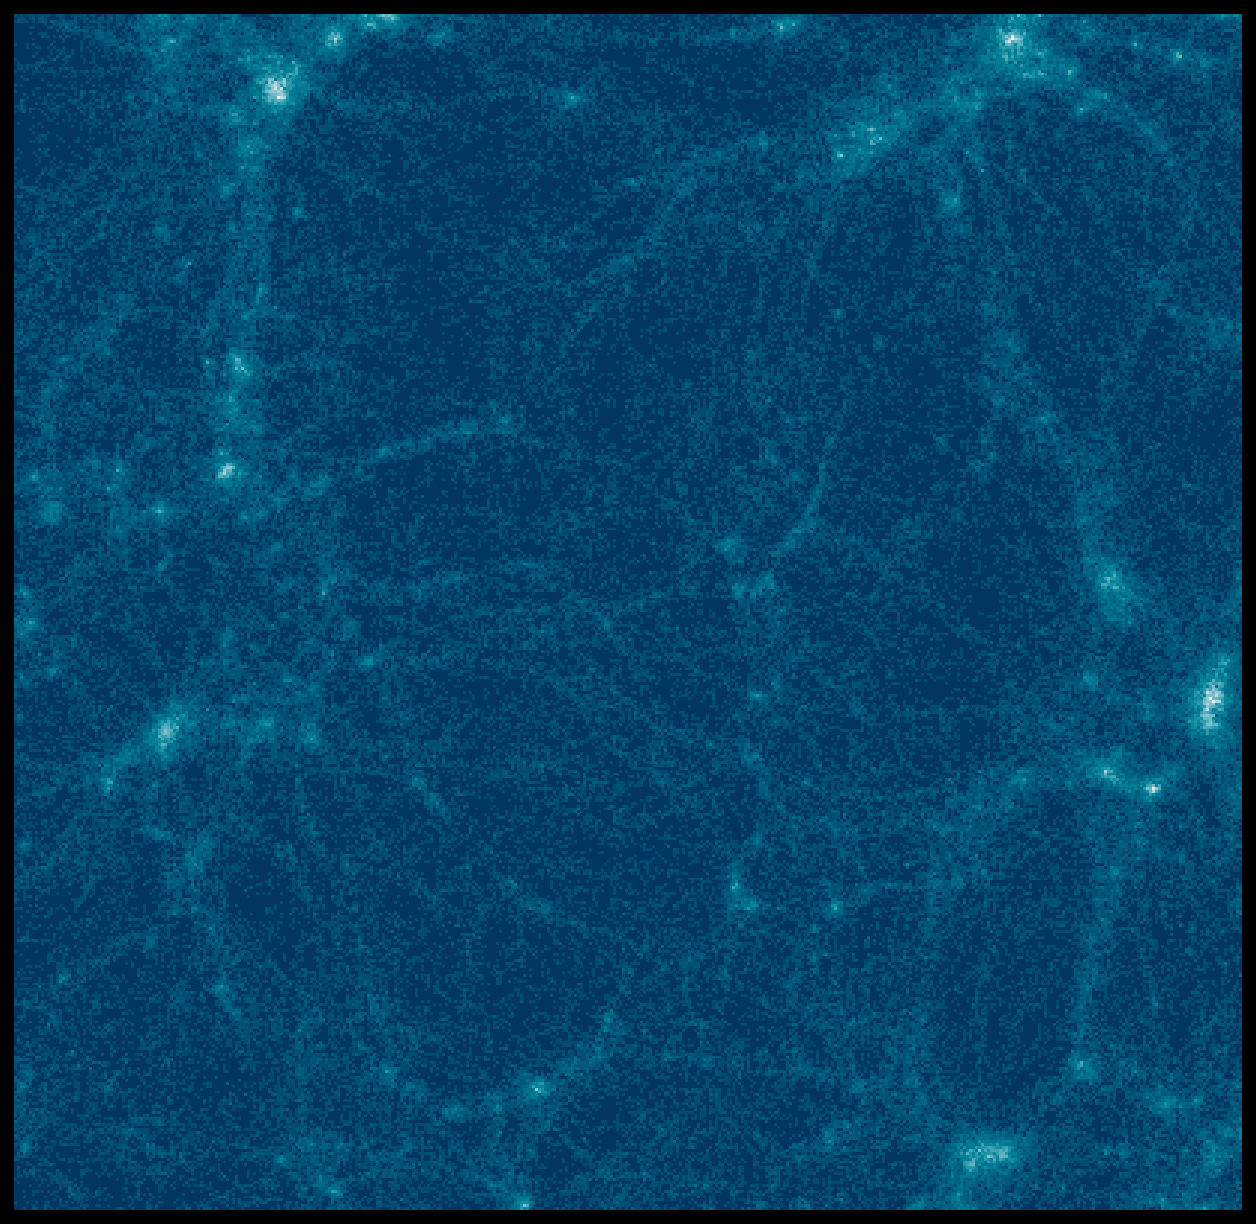

In [ ]:
#Custom colormap based on halo density
plt.figure(figsize=(11,11))

plt.hist2d(halos_in_region['x'],halos_in_region['y'],
           bins=[int(len(halos_in_region)/500.),int(len(halos_in_region)/500.)],weights=np.log10(halos_in_region['mvir']),
           norm=colors.PowerNorm(gamma=0.5),cmap=custom_colormap)

plt.axis('off')

plt.show()

## Submit Your Parameters <a name="third-bullet"></a>

Please enter the coordinates (`x_center`, `y_center`, `z_center`) and color HEX codes (`underdense_color`, `transition_color`, `dense_color`) to [this form](https://docs.google.com/forms/d/e/1FAIpQLSdzYokk5LLebt-0JGXFC4HBcjgWzJdYvGyW5CJiq2wSli-Ktw/viewform?usp=sf_link).

These parameters will be used to create a draft of the high-resolution version of your visualization based on the particle density. Next week, we'll work together to adjust this draft version before the final visualization is created during the last week of the course.



